## Explore some professional seismic wave Python code, Pt. 2
This code comes from the Physical Acoustics Laboratory in Aukland, New Zealand. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [12]:
df = pd.read_csv("Chile_quake.csv")
df.head()

,Channel,Lat,Lon,Distance (km),Azimuth (deg),Phase,Arrival Time
0,AG.LCAR.HHZ.00,36.0700,-91.1540,58.6432,340.680,P,56:42.3
1,AK.RND.BHZ.,63.4056,-148.8602,102.1430,333.158,Pdif,00:39.9
2,AU.FORT.BHZ.,-30.7790,128.0590,126.7310,200.194,PKPdf,05:48.8
3,AU.MAW.BHZ.,-67.6040,62.8710,86.6265,163.903,P,59:29.2
4,AU.MTN.BHZ.,-12.8436,131.1327,141.2040,215.297,PKPdf,06:15.8


In [3]:
# setup mercator map projection.
m = Basemap(projection='ortho',lat_0=-19.6097,lon_0=-70.7691,resolution='l')

In [4]:
# define the location of your seismic station, convert to map
# coordinates, and add it to the map:
def plotCircle(index):
    lon = df["Lon"][index]
    lat = df["Lat"][index]
    dist = df["Distance (km)"][index]
    mlon, mlat = m(lon, lat)
    m.plot(mlon, mlat, 'rd', markersize=8)
    # define the epicentral distance Delta and plot this as a circle on the map:
    m.tissot(lon, lat, dist, 100,zorder=10,edgecolor='black',linewidth=3,facecolor='none')

In [10]:
plotCircle(14)
plotCircle(16)
plotCircle(19)

                Geostationary, Orthographic or Azimuthal equidistant basemap
                

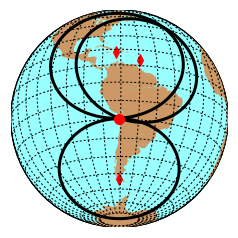

In [11]:
# plot bathymetry/topgraphy:
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')

# draw parallels
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,10),labels=[1,0,0,1])

# define the epicentre of the earthquake, convert to map
# coordinates, and add it to the map:
EQlon, EQlat =m(-70.7691,-19.6097)
m.plot(EQlon, EQlat, 'ro', markersize=10,zorder=10)

plt.show()